<a href="https://colab.research.google.com/github/Iskhand/RNN_Ternak/blob/main/Ternak/Babi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

import tensorflow as tf

In [2]:
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [3]:
url="https://raw.githubusercontent.com/Iskhand/RNN_Ternak/main/dataset.xlsx"
df = pd.read_excel(url)
df.set_index('Tahun', inplace=True)
df

,Sapi Potong,Sapi Perah,Kambing,Kerbau,Ayam Kampung,Ayam Pedaging,Ayam Petelur,Itik,Babi
Tahun,,,,,,,,,
2006,10875125,369008,13789955,2166606,291085191,797527446,100201556,32480718,6218202
2007,11514871,374067,14470214,2085779,272251141,891659346,111488878,35866833,6710757
2008,12256604,457577,15147432,1930716,243423389,902052418,107955170,39839520,6837528
2009,12759838,474701,15815317,1932927,249963499,1026378580,111417637,40675995,6974732
2010,13581571,488488,16619599,1999604,257544104,986871711,105210062,44301804,7476665
2011,14824373,597213,16946187,1305078,264339634,1177990869,124635794,43487519,7524788
2012,15980696,611940,17905862,1438295,274564427,1244402017,138717751,49295007,7900362
2013,12686239,444266,18500321,1109636,276776576,1344191104,146621514,51355088,7598694
2014,14726875,502516,18639532,1335147,275116120,1443349117,146660415,52682954,7694131


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 2006 to 2022
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sapi Potong    17 non-null     int64
 1   Sapi Perah     17 non-null     int64
 2   Kambing        17 non-null     int64
 3   Kerbau         17 non-null     int64
 4   Ayam Kampung   17 non-null     int64
 5   Ayam Pedaging  17 non-null     int64
 6   Ayam Petelur   17 non-null     int64
 7   Itik           17 non-null     int64
 8   Babi           17 non-null     int64
dtypes: int64(9)
memory usage: 1.3 KB


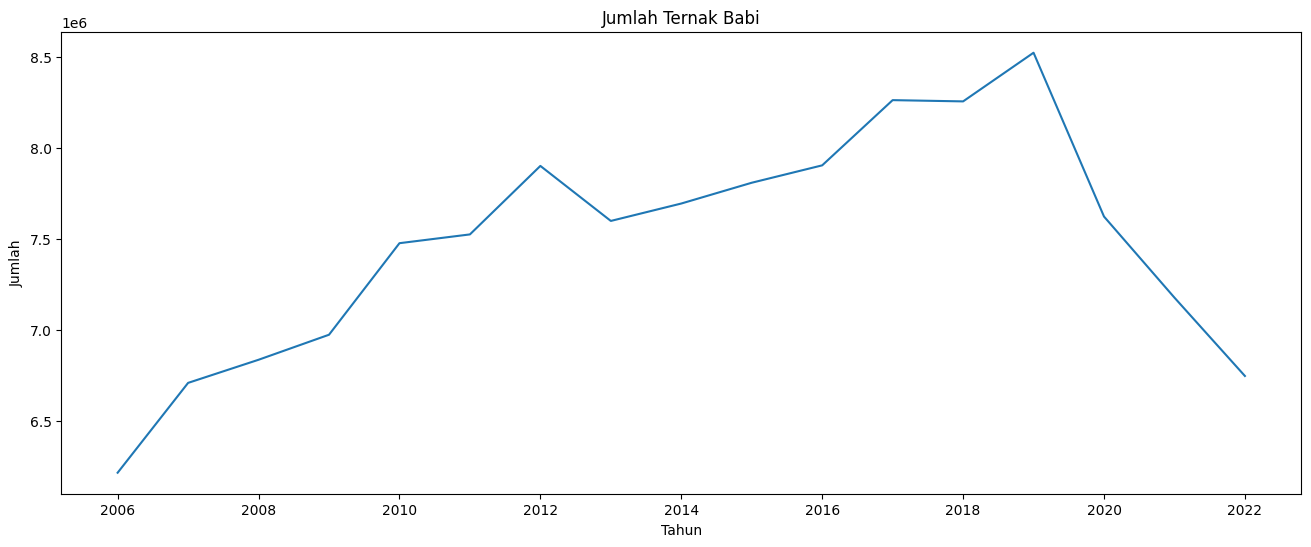

In [5]:
plt.figure(figsize=(16, 6))
plt.title("Jumlah Ternak Babi")
plt.plot(df['Babi'])
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.show()

In [6]:
dataset = df[['Babi']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.21389906],
       [0.26895119],
       [0.32853399],
       [0.54650558],
       [0.56740369],
       [0.73050207],
       [0.59949842],
       [0.64094331],
       [0.6904299 ],
       [0.73184308],
       [0.88711212],
       [0.88412134],
       [1.        ],
       [0.6099338 ],
       [0.41684424],
       [0.23033901]])

In [7]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

n_train = train_data.shape[0]
n_test = test_data.shape[0]

print("Jumlah data latih:", n_train)
print("Jumlah data uji:", n_test)

Jumlah data latih: 13
Jumlah data uji: 4


In [8]:
def create_dataset(data, time_steps=1):
    x, y = [], []
    for i in range(time_steps, len(data)):
        x.append(data[i-time_steps:i])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

time_steps = 3
x_train, y_train = create_dataset(train_data, time_steps)
x_test, y_test = create_dataset(test_data, time_steps)

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [9]:
print(x_train.shape)
print(x_test.shape)

(10, 3, 1)
(1, 3, 1)


In [10]:
model = Sequential([
    LSTM(32, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(16),
    Dense(8),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mape'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 32)             4352      
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 7633 (29.82 KB)
Trainable params: 7633 (29.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [13]:
history = model.fit(x_train, y_train, epochs=100, batch_size=2, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/100
5/5 [==============================] - 11s 428ms/step - loss: 0.3893 - mape: 91.4667 - val_loss: 0.0117 - val_mape: 46.9789
Epoch 2/100
5/5 [==============================] - 0s 18ms/step - loss: 0.2996 - mape: 79.4732 - val_loss: 1.3629e-04 - val_mape: 5.0684
Epoch 3/100
5/5 [==============================] - 0s 14ms/step - loss: 0.2112 - mape: 66.1419 - val_loss: 0.0099 - val_mape: 43.1902
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 0.1340 - mape: 50.5126 - val_loss: 0.0532 - val_mape: 100.1603
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0670 - mape: 32.5804 - val_loss: 0.1473 - val_mape: 166.5975
Epoch 6/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0176 - mape: 16.2600 - val_loss: 0.2930 - val_mape: 234.9895
Epoch 7/100
5/5 [==============================] - 0s 24ms/step - loss: 0.0098 - mape: 14.6306 - val_loss: 0.4525 - val_mape: 292.0533


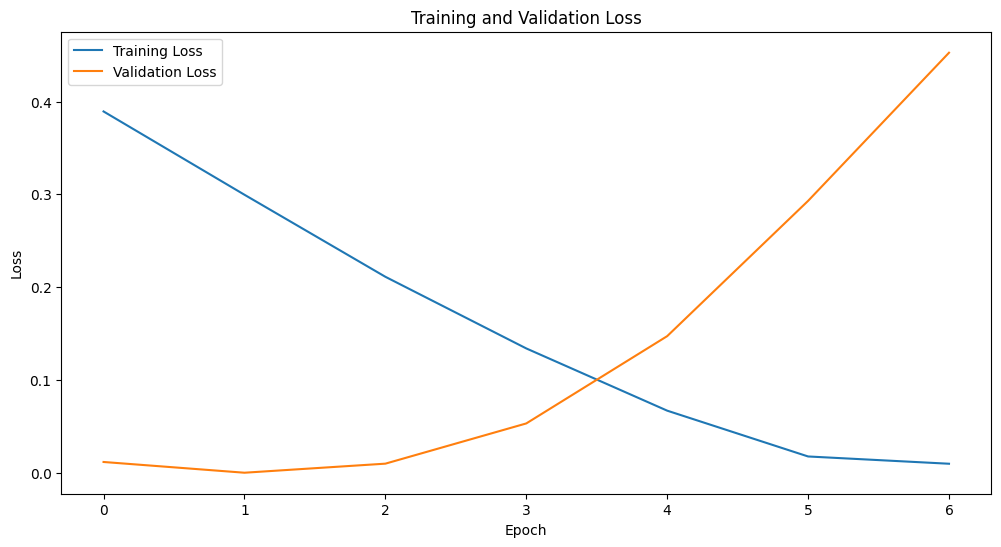

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
def predict_with_sliding_window(model, data, time_steps):
    predictions = []
    for i in range(time_steps, len(data)):
        x_input = data[i-time_steps:i].reshape((1, time_steps, 1))
        y_pred = model.predict(x_input)
        predictions.append(y_pred[0, 0])
    return np.array(predictions)

test_data_full = scaled_data[train_size-time_steps:]

predictions_full = predict_with_sliding_window(model, test_data_full, time_steps)
predictions_full = scaler.inverse_transform(predictions_full.reshape(-1, 1))

y_test_full = dataset['Babi'].values[train_size:]

1/1 [==============================] - 0s 24ms/step


In [16]:
test_df_full = dataset.iloc[train_size:].copy()
test_df_full['Predictions'] = np.nan
test_df_full.iloc[:len(predictions_full), test_df_full.columns.get_loc('Predictions')] = predictions_full.flatten()
print("Data Test dengan Prediksi:")
print(test_df_full)

Data Test dengan Prediksi:
          Babi  Predictions
Tahun                      
2019   8520947    6752857.5
2020   7622724    6788536.0
2021   7178088    6770805.5
2022   6748614    6721730.5


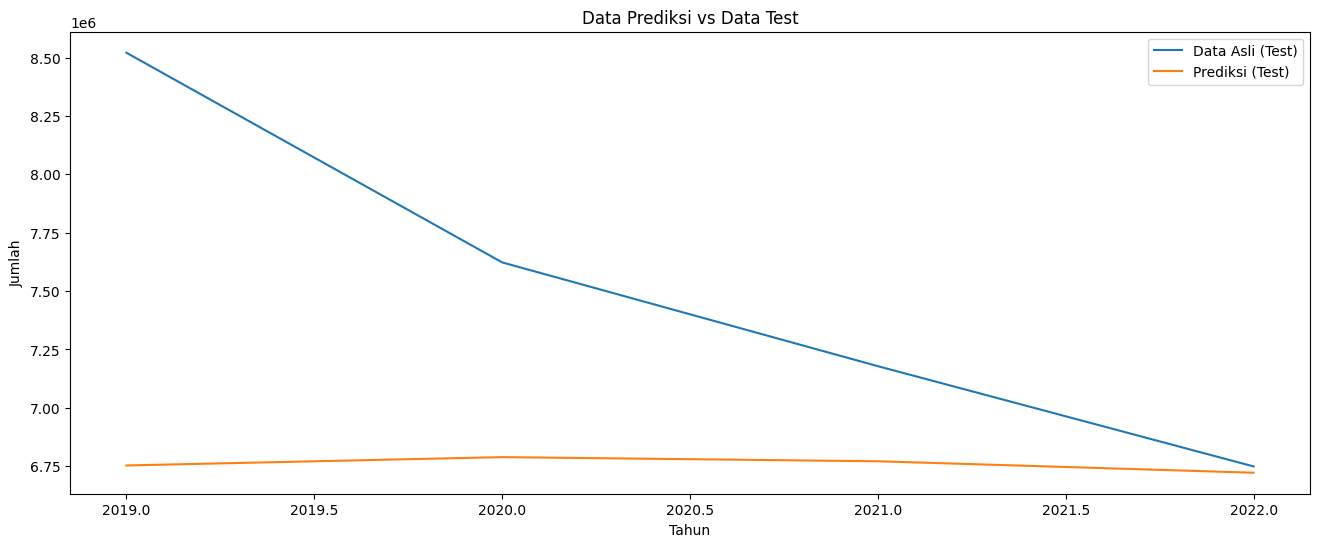

In [17]:
plt.figure(figsize=(16, 6))
plt.plot(dataset.index[train_size:], y_test_full, label='Data Asli (Test)')
plt.plot(dataset.index[train_size:], predictions_full, label='Prediksi (Test)')
plt.title('Data Prediksi vs Data Test')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.legend()
plt.show()

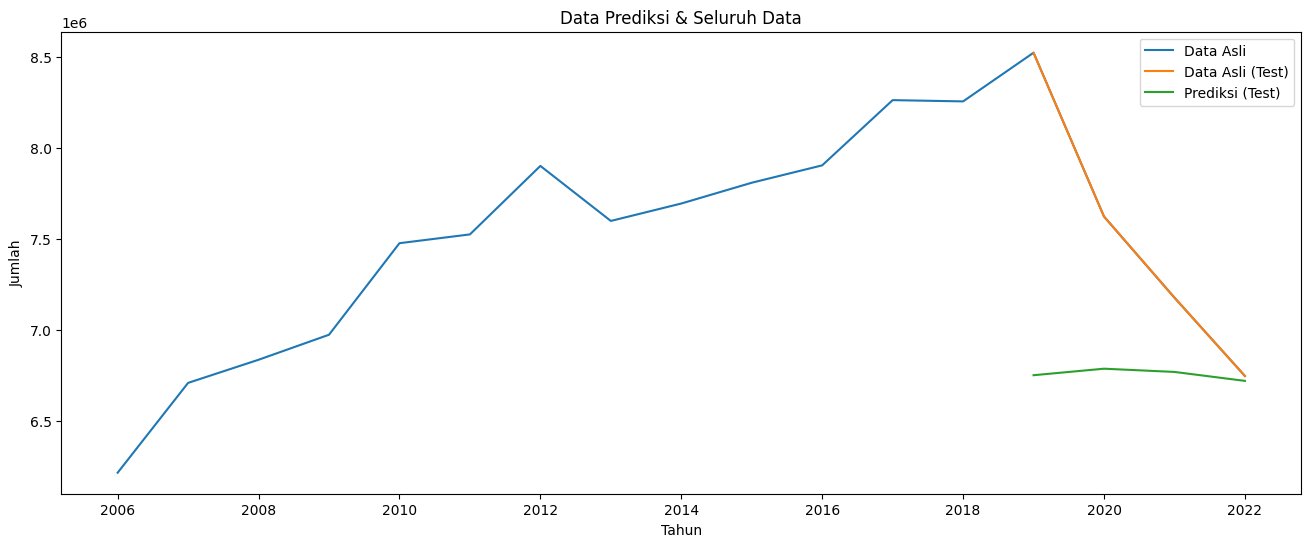

In [18]:
plt.figure(figsize=(16, 6))
plt.plot(dataset.index, dataset['Babi'], label='Data Asli')
plt.plot(dataset.index[train_size:], y_test_full, label='Data Asli (Test)')
plt.plot(dataset.index[train_size:], predictions_full, label='Prediksi (Test)')
plt.title('Data Prediksi & Seluruh Data')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.legend()
plt.show()

In [19]:
rmse = np.sqrt(mean_squared_error(y_test_full, predictions_full))
mape = mean_absolute_percentage_error(y_test_full, predictions_full.flatten()) * 100

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

RMSE: 998575.4674450938
MAPE: 9.441419969106017


1/1 [==============================] - 0s 24ms/step
      Predicted_Jumlah
2023         6616175.5
2024         6555820.5
2025         6516269.0
2026         6502417.5
2027         6495600.5
2028         6491875.5
2029         6490422.0
2030         6489698.5
2031         6489337.5
2032         6489185.5
2033         6489111.0
2034         6489075.0
2035         6489059.5
2036         6489051.5
2037         6489048.5


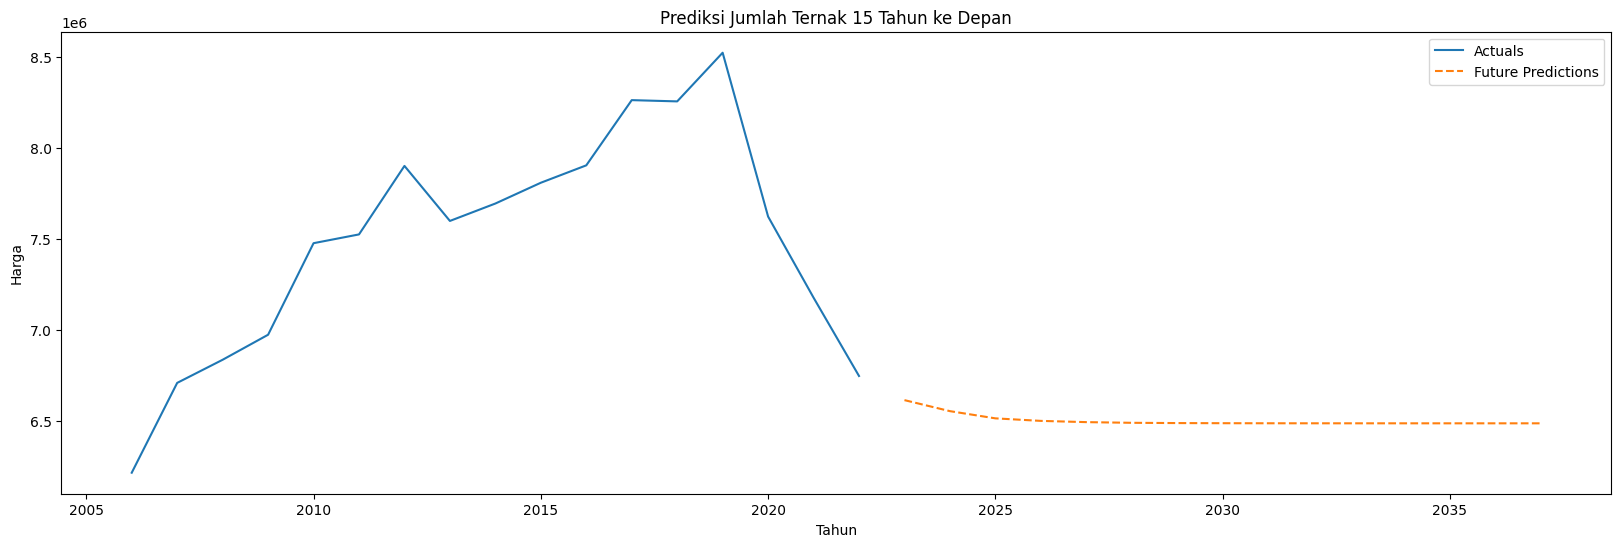

In [20]:
n_years = 15
last_data = scaled_data[-time_steps:]

future_predictions = []
for _ in range(n_years):
    pred = model.predict(last_data.reshape(1, time_steps, 1))
    future_predictions.append(pred[0, 0])
    last_data = np.append(last_data[1:], pred[0, 0]).reshape(time_steps, 1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

last_year = df.index[-1]
future_years = [last_year + i for i in range(1, n_years + 1)]
future_df = pd.DataFrame(data=future_predictions, index=future_years, columns=['Predicted_Jumlah'])

print(future_df)

plt.figure(figsize=(20, 6))
plt.plot(df['Babi'], label='Actuals')
plt.plot(future_df['Predicted_Jumlah'], label='Future Predictions', linestyle='--')
plt.title(f'Prediksi Jumlah Ternak {n_years} Tahun ke Depan')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.legend()
plt.show()